In [1]:
from functions import *
from utility_functions import *



from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


from sklearn.mixture import GaussianMixture


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy


import networkx as nx
from matplotlib.pyplot import figure, text
from matplotlib import gridspec

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm

import os
import datetime


#Building the neural network


import seaborn as sns

import re

from collections import defaultdict

from geopy.geocoders import Nominatim

from community import community_louvain

import sys

import csv



import random

from tempfile import TemporaryFile


import country_converter as coco



import pickle

from mpl_toolkits.basemap import Basemap
import time
from multiprocessing import Pool


2024-01-15 14:48:52.057483: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 14:48:52.369014: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 14:48:52.375055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /shared/centos7/anaconda3/3.7/lib:/shared/centos7/nodejs/14.15.4/lib
2024-01-15 14:

In [2]:
def region_format_for_here(list_of_places):
    new_list=[]
    for i in list_of_places:
        if i=='USA':
            new_list.append('United States')
        elif i=='CzechRepublic':
            new_list.append('Czechia')
        elif i=='DRC':
            new_list.append('Democratic Republic of the Congo')
        elif i=='Korea, Republic of':
            new_list.append('South Korea')
        elif i=='Russian Federation':
            new_list.append('Russia')
        elif i=='Czech Republic':
            new_list.append('Czechia')            
        elif i=='Gambia':
            new_list.append('The Gambia')
        elif i=='Macedonia, the former Yugoslav Republic of':
            new_list.append('North Macedonia')
        elif i=='Taiwan, Province of China':
            new_list.append('Taiwan')    
        elif i=='Venezuela, Bolivarian Republic of':
            new_list.append('Venezuela')               
        elif i=='Iran, Islamic Republic of':
            new_list.append('Iran')    
        elif i=='Viet Nam':
            new_list.append('Vietnam')    
        elif i.upper()==i:
            new_list.append(i)
        else:
            new_list.append(' '.join(re.findall('[A-Z][^A-Z]*',i)))
    
    new_new_list=[]#remove double splitting
    for i in new_list:
        new_new_list.append(' '.join(i.split()))
    
    return new_new_list



In [3]:


    
def NB_wholedf(region_i):

    df_pair=df_even[(df_even[target]==region_leave_out)|(df_even[target]==region_i)]
    df_pair=df_pair.reset_index(drop=True)



    Y_NB_Kmer_Ngram=[[] for i in range(len(Kmer))]
    Accuracy=[[] for i in range(len(Kmer))]


    for i,kmer_i in enumerate(Kmer):
        for ngram_size in Ngram_size:
            genome = df_pair
            genome['words'] = genome.apply(lambda x: getKmers(x['sequence'],size=kmer_i), axis=1)
            genome = genome.drop('sequence', axis=1)
            genome_texts = list(genome['words'])
            for item in range(len(genome_texts)):
                genome_texts[item] = ' '.join(genome_texts[item])
            y = genome[target]
            cv = CountVectorizer(ngram_range=(ngram_size,ngram_size))
            X = cv.fit_transform(genome_texts)
            NB = MultinomialNB(alpha=0.1)
            y_NB=cross_val_predict(NB, X, y, cv=5)
            Y_NB_Kmer_Ngram[i].append(y_NB)



    for k in range(len(Kmer)):
        for n in range(len(Ngram_size)):
            y_NB=Y_NB_Kmer_Ngram[k][n]
            accuracy, precision, recall, f1 = get_metrics(y, y_NB)
            Accuracy[k].append(accuracy)
            globals()[f"Accuracy_dict_centroid_{region_leave_out}"][region_i]=Accuracy
            cross_table = pd.crosstab(np.array(y), np.array(y_NB), rownames=['Actual'], colnames=['Predicted'], margins=True)
            globals()[f"indis_centroid_{region_leave_out}"][region_i]=(int(cross_table[region_i][region_leave_out])/int(cross_table.loc[[region_leave_out]]['All'])\
            +int(cross_table[region_leave_out][region_i])/int(cross_table.loc[[region_i]]['All']))/2
            #print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))          
            #print("Confusion matrix\n")
            globals()[f"NB_binary_centroid_{region_leave_out}_{region_i}"]=cross_table

            #print('-'*50)   

    # Constructing the file path
    file_name = f'centroid_{region_leave_out}_Pred_{region_i}.txt'

    path = os.path.join(dir_path, file_name)

    # Ensure the directory exists
    os.makedirs(dir_path, exist_ok=True)
    np.savetxt(path, Y_NB_Kmer_Ngram[0][0], delimiter=",", fmt="%s") 

            

    globals()[f"indis_centroid_{region_leave_out}"][region_leave_out]=1
    
    return 



# Read the saved dataframe with month column

In [4]:
Total_distance_dict={}
Even_dist_sum_dict={}

In [5]:
df_date=pd.read_csv('data/df_date.csv')  
df_date['Date']

0         2019-12-05
1         2019-12-24
2         2019-12-26
3         2019-12-30
4         2019-12-30
             ...    
551225    2021-05-14
551226    2021-05-17
551227    2021-05-17
551228    2021-05-18
551229    2021-05-21
Name: Date, Length: 551230, dtype: object

In [6]:
months=sorted(list(set([i[:7] for i in list(df_date['Date'])])))
months

['2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05']

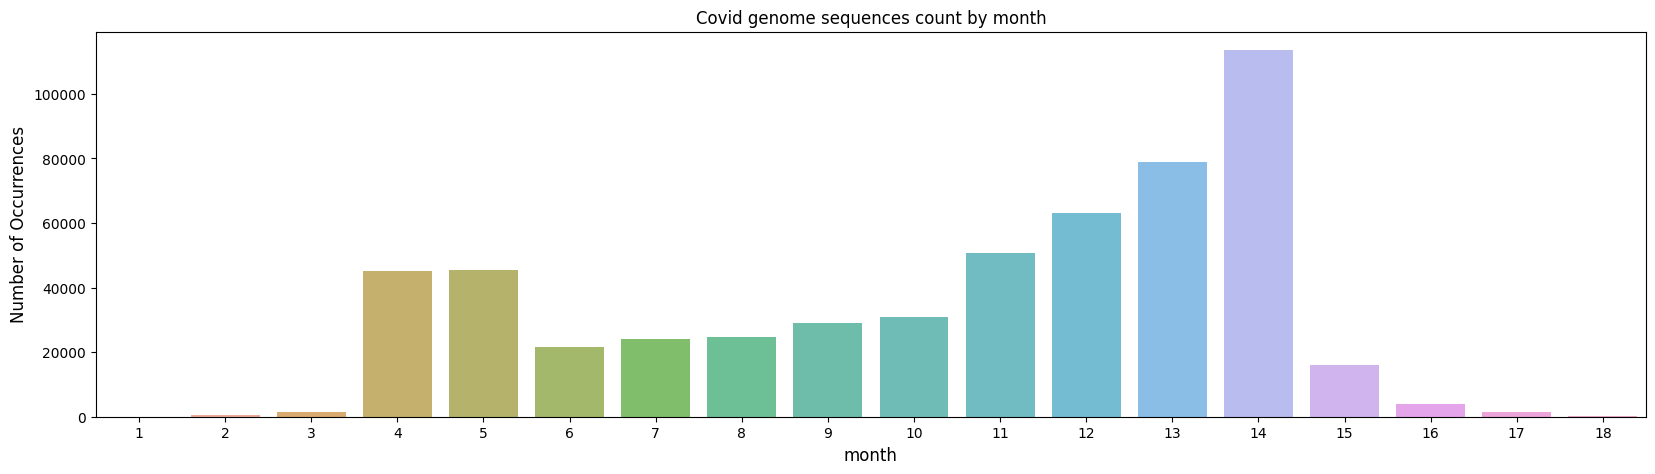

In [7]:
n_top=40
feature_count  = df_date['Month'].value_counts()
feature_count = feature_count[:n_top,]
plt.figure(figsize=(20,5))
sns.barplot(x=feature_count.index, y=feature_count.values, alpha=0.8)
plt.title('Covid genome sequences count by month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.show()

# parallel by region
## the predicted regions were saved in results

In [8]:


target='country'
Kmer=[100]
kmer=Kmer[0]
Ngram_size=[1]
threshold=200
sample_size=200


In [9]:
for month_index,month_i in enumerate(months):
    print(month_index,month_i)

0 2019-12
1 2020-01
2 2020-02
3 2020-03
4 2020-04
5 2020-05
6 2020-06
7 2020-07
8 2020-08
9 2020-09
10 2020-10
11 2020-11
12 2020-12
13 2021-01
14 2021-02
15 2021-03
16 2021-04
17 2021-05


In [10]:
path=f'cross_validation_prediction/Accuracy_dict_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'
print(path)
path=f'cross_validation_prediction/Indistinguishability_dict_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'
print(path)


cross_validation_prediction/Accuracy_dict_BinaryNB_monthly2021-05_countrylevel_cv5fold_threshold200_SampleSize200_kmer100.pickle
cross_validation_prediction/Indistinguishability_dict_BinaryNB_monthly2021-05_countrylevel_cv5fold_threshold200_SampleSize200_kmer100.pickle


In [11]:
for month_index,month_i in enumerate(months):
    if month_index>=4:
    #if month_index<4:
        df_monthi=df_date[df_date['Month']==month_index]
        df_filtered=filter_df(df_monthi,target, threshold)
        df_even_=df_filtered.groupby(target).apply (lambda x: x.sample(n=sample_size,random_state=1))
        df_even=df_even_.reset_index(drop=True)
        region_list=list(set(df_even[target]))
        n_proc=min(40,len(region_list))
        dir_path = f'cross_validation_prediction/BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}/'

        Accuracy_dict=defaultdict()
        indis_dict=defaultdict()
        
        for region_leave_out in region_list:
            region_list_noncentroid=list(np.copy(region_list))
            region_list_noncentroid.remove(region_leave_out)
            #Initialise the accuracy_centroid dictionary
            globals()[f"indis_centroid_{region_leave_out}"]=defaultdict()
            globals()[f"Accuracy_dict_centroid_{region_leave_out}"]=defaultdict()
            list_inputs=region_list_noncentroid
            if __name__ == "__main__":
                start = time.perf_counter()
                with Pool(n_proc) as p:   
                    p.map(NB_wholedf, list_inputs)
                print(f"Elapsed time: {round(time.perf_counter() - start, 2)}")      

            # load the results to later save the results
            globals()[f"indis_centroid_{region_leave_out}"][region_leave_out]=1
            for region_i in region_list_noncentroid:
                df_pair=df_even[(df_even[target]==region_leave_out)|(df_even[target]==region_i)]
                df_pair=df_pair.reset_index(drop=True)
                y = df_pair[target]
                file_name = f'centroid_{region_leave_out}_Pred_{region_i}.txt'
                path = os.path.join(dir_path, file_name)        

                # load the results
                y_NB = np.loadtxt(path, dtype=str, delimiter='\n')

                #y_NB=np.loadtxt(path, dtype=np.str)
                accuracy, precision, recall, f1 = get_metrics(y, y_NB)
                globals()[f"Accuracy_dict_centroid_{region_leave_out}"][region_i]=accuracy
                cross_table = pd.crosstab(np.array(y), np.array(y_NB), rownames=['Actual'], colnames=['Predicted'], margins=True)
                globals()[f"indis_centroid_{region_leave_out}"][region_i]=(int(cross_table[region_i][region_leave_out])/int(cross_table.loc[[region_leave_out]]['All'])\
                +int(cross_table[region_leave_out][region_i])/int(cross_table.loc[[region_i]]['All']))/2
                globals()[f"NB_binary_centroid_{region_leave_out}_{region_i}"]=cross_table


                Accuracy_dict[(region_leave_out,region_i)]=accuracy

                indis_dict[(region_leave_out,region_i)]=(int(cross_table[region_i][region_leave_out])/int(cross_table.loc[[region_leave_out]]['All'])\
                +int(cross_table[region_leave_out][region_i])/int(cross_table.loc[[region_i]]['All']))/2
        path=f'cross_validation_prediction/Accuracy_dict_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'
        with open(path, 'wb') as handle:
            pickle.dump(Accuracy_dict,handle)
            
        path=f'cross_validation_prediction/Indistinguishability_dict_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'
        with open(path, 'wb') as handle:
            pickle.dump(indis_dict,handle)                    
                    
                
        # Save the loaded pairwise results into one pickle file
        accuracy_true=defaultdict()
        # when each region in the dictionary keys are the true region
        for region_leave_out in region_list:
            accuracy_true[region_leave_out]=np.mean(list(globals()[f"Accuracy_dict_centroid_{region_leave_out}"].values()))


        accuracy_predicted=defaultdict()
        # when each region in the dictionary keys are the predicted region
        for region_i in region_list:
            accuracy_predicted_region_i=[]
            for region_leave_out in region_list:
                #iterates through the centroids, get the misclassification rates of the centroid being misclassified as region_i
                try: 
                    accuracy_predicted_region_i.append(globals()[f"Accuracy_dict_centroid_{region_leave_out}"][region_i])
                except: 
                    accuracy_predicted_region_i.append(0)
            accuracy_predicted[region_i]=np.mean(accuracy_predicted_region_i)   
            
        path=f'cross_validation_prediction/accuracy_true_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'

        with open(path, 'wb') as handle:
            pickle.dump(accuracy_true,handle)
            
        path=f'cross_validation_prediction/accuracy_pred_BinaryNB_monthly{month_i}_{target}level_cv5fold_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pickle'

        with open(path, 'wb') as handle:
            pickle.dump(accuracy_predicted,handle)
            
        print(path)



Elapsed time: 32.11
Elapsed time: 31.13
Elapsed time: 32.65
Elapsed time: 32.54
Elapsed time: 32.6
Elapsed time: 32.28
Elapsed time: 32.41
Elapsed time: 31.9
Elapsed time: 31.65
Elapsed time: 32.09
Elapsed time: 33.15
Elapsed time: 33.14
Elapsed time: 32.64
Elapsed time: 33.66
Elapsed time: 32.23
Elapsed time: 33.03
Elapsed time: 31.15
Elapsed time: 32.76
Elapsed time: 31.67
Elapsed time: 32.51
Elapsed time: 31.51
Elapsed time: 32.22
Elapsed time: 32.55
cross_validation_prediction/accuracy_pred_BinaryNB_monthly2020-04_countrylevel_cv5fold_threshold200_SampleSize200_kmer100.pickle
Elapsed time: 29.82
Elapsed time: 30.39
Elapsed time: 31.29
Elapsed time: 30.82
Elapsed time: 29.8
Elapsed time: 30.48
Elapsed time: 31.47
Elapsed time: 29.15
Elapsed time: 29.82
Elapsed time: 29.97
Elapsed time: 30.18
Elapsed time: 30.64
Elapsed time: 30.14
Elapsed time: 29.92
Elapsed time: 30.94
Elapsed time: 30.5
Elapsed time: 30.03
Elapsed time: 30.46
cross_validation_prediction/accuracy_pred_BinaryNB_mont